Compute integrals of the form

$$
I_n = \int_0^1 x^n e^{1-x}\, dx\;.
$$

Integrating by parts, we obtain a recurrence relation

$$
I_n = n I_{n-1} - 1 \;,
$$

with the initial condition

$$
I_0 = e - 1\;.
$$

These integrals can be computed using symbolic maths with `sympy`:

In [27]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
x = sympy.Symbol('x')
N = 25
exact = [float(sympy.integrate(x**n * sympy.exp(1 - x), (x, 0, 1))) for n in range(N)]

In [36]:
print(exact)

[1.7182818284590453, 0.7182818284590452, 0.43656365691809046, 0.30969097075427143, 0.23876388301708565, 0.19381941508542824, 0.16291649051256946, 0.14041543358798622, 0.12332346870388973, 0.10991121833500754, 0.0991121833500754, 0.09023401685082952, 0.08280820220995427, 0.07650662872940558, 0.07109280221167809, 0.0663920331751714, 0.06227253080274239, 0.05863302364662064, 0.05539442563917152, 0.052494087144258815, 0.049881742885176245, 0.04751660058870116, 0.04536521295142559, 0.04339989788278872, 0.041597549186929206]


Use the recurrence relation to compute these integrals  from $n=0$ up to $n = 24$ inclusive. 


First, use the upwards recursion, from $n=1$ upwards. Your code below must product a list of the 25 values of the integrals.

In [28]:
def upwards_recursion(n):
    """Compute the integrals using the upwards recursion."""
    def temp(i):
        if i == 0:
            return np.exp(1) - 1
        return i * temp(i - 1) - 1
    x = np.arange(n)
    z = np.zeros(n)
    for i in range (n):
        z[i] = temp(x[i])
    return z

In [29]:
print(upwards_recursion(25))

[ 1.71828183e+00  7.18281828e-01  4.36563657e-01  3.09690971e-01
  2.38763883e-01  1.93819415e-01  1.62916491e-01  1.40415434e-01
  1.23323469e-01  1.09911218e-01  9.91121828e-02  9.02340111e-02
  8.28081330e-02  7.65057285e-02  7.10801993e-02  6.62029896e-02
  5.92478342e-02  7.21318116e-03 -8.70162739e-01 -1.75330920e+01
 -3.51661841e+02 -7.38589866e+03 -1.62490770e+05 -3.73728872e+06
 -8.96949303e+07]


Compare your results with the exact values. Discuss

In [30]:
values = upwards_recursion(25)
for value, exact_value in zip(values, exact):
    print(value, exact)

from numpy.testing import assert_allclose
assert_allclose(values, exact)

1.718281828459045 [1.7182818284590453, 0.7182818284590452, 0.43656365691809046, 0.30969097075427143, 0.23876388301708565, 0.19381941508542824, 0.16291649051256946, 0.14041543358798622, 0.12332346870388973, 0.10991121833500754, 0.0991121833500754, 0.09023401685082952, 0.08280820220995427, 0.07650662872940558, 0.07109280221167809, 0.0663920331751714, 0.06227253080274239, 0.05863302364662064, 0.05539442563917152, 0.052494087144258815, 0.049881742885176245, 0.04751660058870116, 0.04536521295142559, 0.04339989788278872, 0.041597549186929206]
0.7182818284590451 [1.7182818284590453, 0.7182818284590452, 0.43656365691809046, 0.30969097075427143, 0.23876388301708565, 0.19381941508542824, 0.16291649051256946, 0.14041543358798622, 0.12332346870388973, 0.10991121833500754, 0.0991121833500754, 0.09023401685082952, 0.08280820220995427, 0.07650662872940558, 0.07109280221167809, 0.0663920331751714, 0.06227253080274239, 0.05863302364662064, 0.05539442563917152, 0.052494087144258815, 0.049881742885176245

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatch: 52%
Max absolute difference: 89694930.34440386
Max relative difference: 2.15625517e+09
 x: array([ 1.718282e+00,  7.182818e-01,  4.365637e-01,  3.096910e-01,
        2.387639e-01,  1.938194e-01,  1.629165e-01,  1.404154e-01,
        1.233235e-01,  1.099112e-01,  9.911218e-02,  9.023401e-02,...
 y: array([1.718282, 0.718282, 0.436564, 0.309691, 0.238764, 0.193819,
       0.162916, 0.140415, 0.123323, 0.109911, 0.099112, 0.090234,
       0.082808, 0.076507, 0.071093, 0.066392, 0.062273, 0.058633,...

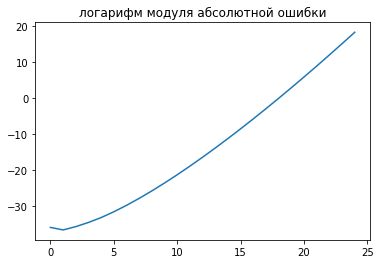

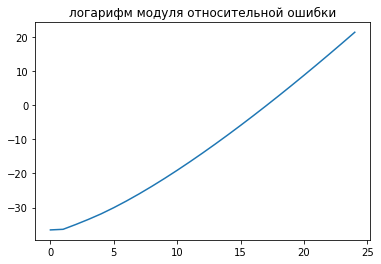

графики логарифма ошибки имеют достаточно большой линейный тренд уже начиная с 10й итерации, так что можно сделать вывод о том, что в ходе рекурсии ошибка растет практически экспоненциально. Что логично, по причине того, что исходя из математической модели ошибка с (n-1)-го шага умножается на n. В силу этого ошибка будет расти как факториал, который при разложении по ф-ле Стирлига дает экспоненту


In [35]:
plt.plot(np.log(abs(exact-upwards_recursion(25))))
plt.title('логарифм модуля абсолютной ошибки')
plt.show()
plt.plot(np.log(abs(exact-upwards_recursion(25))/exact))
plt.title('логарифм модуля относительной ошибки')
plt.show()
print( 'графики логарифма ошибки имеют достаточно большой линейный тренд уже начиная с 10й итерации, так что можно сделать вывод о том, что в ходе рекурсии ошибка растет практически экспоненциально. Что логично, по причине того, что исходя из математической модели ошибка с (n-1)-го шага умножается на n. В силу этого ошибка будет расти как факториал, который при разложении по ф-ле Стирлинга дает экспоненту') 

Next, use the downwards recursion. Your code below must produce a list of the 25 values of the integrals, from 0 to 24.

In [40]:
def downwards_recursion(n):
    def temp(i):
        if i == 1000:
            return 0
        return (temp(i + 1) + 1)/(i + 1)
    x = np.arange(n)
    z = np.zeros(n)
    for i in range (n):
        z[i] = temp(x[i])
    return z

In [41]:
values = downwards_recursion(25)
for value, exact_value in zip(values, exact):
    print(value, exact)

from numpy.testing import assert_allclose
assert_allclose(values, exact)

1.718281828459045 [1.7182818284590453, 0.7182818284590452, 0.43656365691809046, 0.30969097075427143, 0.23876388301708565, 0.19381941508542824, 0.16291649051256946, 0.14041543358798622, 0.12332346870388973, 0.10991121833500754, 0.0991121833500754, 0.09023401685082952, 0.08280820220995427, 0.07650662872940558, 0.07109280221167809, 0.0663920331751714, 0.06227253080274239, 0.05863302364662064, 0.05539442563917152, 0.052494087144258815, 0.049881742885176245, 0.04751660058870116, 0.04536521295142559, 0.04339989788278872, 0.041597549186929206]
0.7182818284590452 [1.7182818284590453, 0.7182818284590452, 0.43656365691809046, 0.30969097075427143, 0.23876388301708565, 0.19381941508542824, 0.16291649051256946, 0.14041543358798622, 0.12332346870388973, 0.10991121833500754, 0.0991121833500754, 0.09023401685082952, 0.08280820220995427, 0.07650662872940558, 0.07109280221167809, 0.0663920331751714, 0.06227253080274239, 0.05863302364662064, 0.05539442563917152, 0.052494087144258815, 0.049881742885176245

Repeat the comparison with the exact values. Discuss.

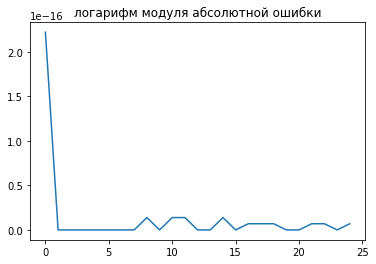

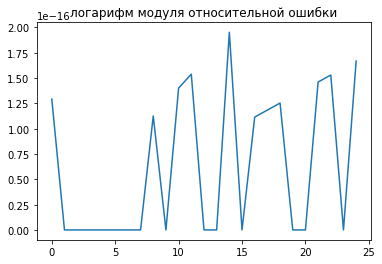

In [44]:
plt.plot((abs(exact-downwards_recursion(25))))
plt.title('модуль абсолютной ошибки')
plt.show()
plt.plot((abs(exact-downwards_recursion(25))/exact))
plt.title('модуль относительной ошибки')
plt.show()

In [46]:
print('Как мы можем видеть, ошибка намного меньше, чем было в предыдущем случае. Более того, я прдпологаю, что эта ошибка связана с округлением. За начальный (конечный) элемент был выбран элемент под номером 1000. Такая точность была достигнута за счет того, что в данном случае суммируется ряд, причем достаточное большое число его элементов.')

Как мы можем видеть, ошибка намного меньше, чем было в предыдущем случае. Более того, я прдпологаю, что эта ошибка связана с округлением. За начальный (конечный) элемент был выбран элемент под номером 1000. Такая точность была достигнута за счет того, что в данном случае суммируется ряд, причем достаточное большое число его элементов.
